<a href="https://colab.research.google.com/github/Hetvi48/AeroCare/blob/main/Dataset_1_LSTM_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pre Processing

In [ ]:
import numpy as np
import pandas as pd

from IPython.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis,
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)

# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates

In [ ]:
index_names = ['engine', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
col_names = index_names + setting_names + sensor_names

In [ ]:
df_train = pd.read_csv('drive/MyDrive/archive/CMaps/train_FD001.txt',sep=r'\s+',header=None,index_col=False,names=col_names)
df_test = pd.read_csv('drive/MyDrive/archive/CMaps/test_FD001.txt',sep=r'\s+',header=None,index_col=False,names=col_names)
df_test_RUL = pd.read_csv('drive/MyDrive/archive/CMaps/RUL_FD001.txt',sep=r'\s+',header=None,index_col=False,names=['RUL'])

In [ ]:
df_train.head()


engine  cycle  setting_1  setting_2  setting_3  (Fan inlet temperature) (◦R)  (LPC outlet temperature) (◦R)  (HPC outlet temperature) (◦R)  (LPT outlet temperature) (◦R)  (Fan inlet Pressure) (psia)  (bypass-duct pressure) (psia)  (HPC outlet pressure) (psia)  (Physical fan speed) (rpm)  (Physical core speed) (rpm)  (Engine pressure ratio(P50/P2)  (HPC outlet Static pressure) (psia)  (Ratio of fuel flow to Ps30) (pps/psia)  (Corrected fan speed) (rpm)  (Corrected core speed) (rpm)  (Bypass Ratio)   (Burner fuel-air ratio)  (Bleed Enthalpy)  (Required fan speed)  (Required fan conversion speed)  (High-pressure turbines Cool air flow)  (Low-pressure turbines Cool air flow)
0       1      1    -0.0007    -0.0004      100.0                        518.67                         641.82                        1589.70                        1400.60                        14.62                          21.61                        554.36                     2388.06                      9046.19                             1.3                                47.47                                   521.66                      2388.02                       8138.62           8.4195                     0.03               392                  2388                            100.0                                   39.06                                23.4190
1       1      2     0.0019    -0.0003      100.0                        518.67                         642.15                        1591.82                        1403.14                        14.62                          21.61                        553.75                     2388.04                      9044.07                             1.3                                47.49                                   522.28                      2388.07                       8131.49           8.4318                     0.03               392                  2388                            100.0                                   39.00                                23.4236
2       1      3    -0.0043     0.0003      100.0                        518.67                         642.35                        1587.99                        1404.20                        14.62                          21.61                        554.26                     2388.08                      9052.94                             1.3                                47.27                                   522.42                      2388.03                       8133.23           8.4178                     0.03               390                  2388                            100.0                                   38.95                                23.3442
3       1      4     0.0007     0.0000      100.0                        518.67                         642.35                        1582.79                        1401.87                        14.62                          21.61                        554.45                     2388.11                      9049.48                             1.3                                47.13                                   522.86                      2388.08                       8133.83           8.3682                     0.03               392                  2388                            100.0                                   38.88                                23.3739
4       1      5    -0.0019    -0.0002      100.0                        518.67                         642.37                        1582.85                        1406.22                        14.62                          21.61                        554.00                     2388.06                      9055.15                             1.3                                47.28                                   522.19                      2388.04                       8133.80           8.4294                     0.03               393                  2388                  

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   engine                                   20631 non-null  int64  
 1   cycle                                    20631 non-null  int64  
 2   setting_1                                20631 non-null  float64
 3   setting_2                                20631 non-null  float64
 4   setting_3                                20631 non-null  float64
 5   (Fan inlet temperature) (◦R)             20631 non-null  float64
 6   (LPC outlet temperature) (◦R)            20631 non-null  float64
 7   (HPC outlet temperature) (◦R)            20631 non-null  float64
 8   (LPT outlet temperature) (◦R)            20631 non-null  float64
 9   (Fan inlet Pressure) (psia)              20631 non-null  float64
 10  (bypass-duct pressure) (psia)            20631

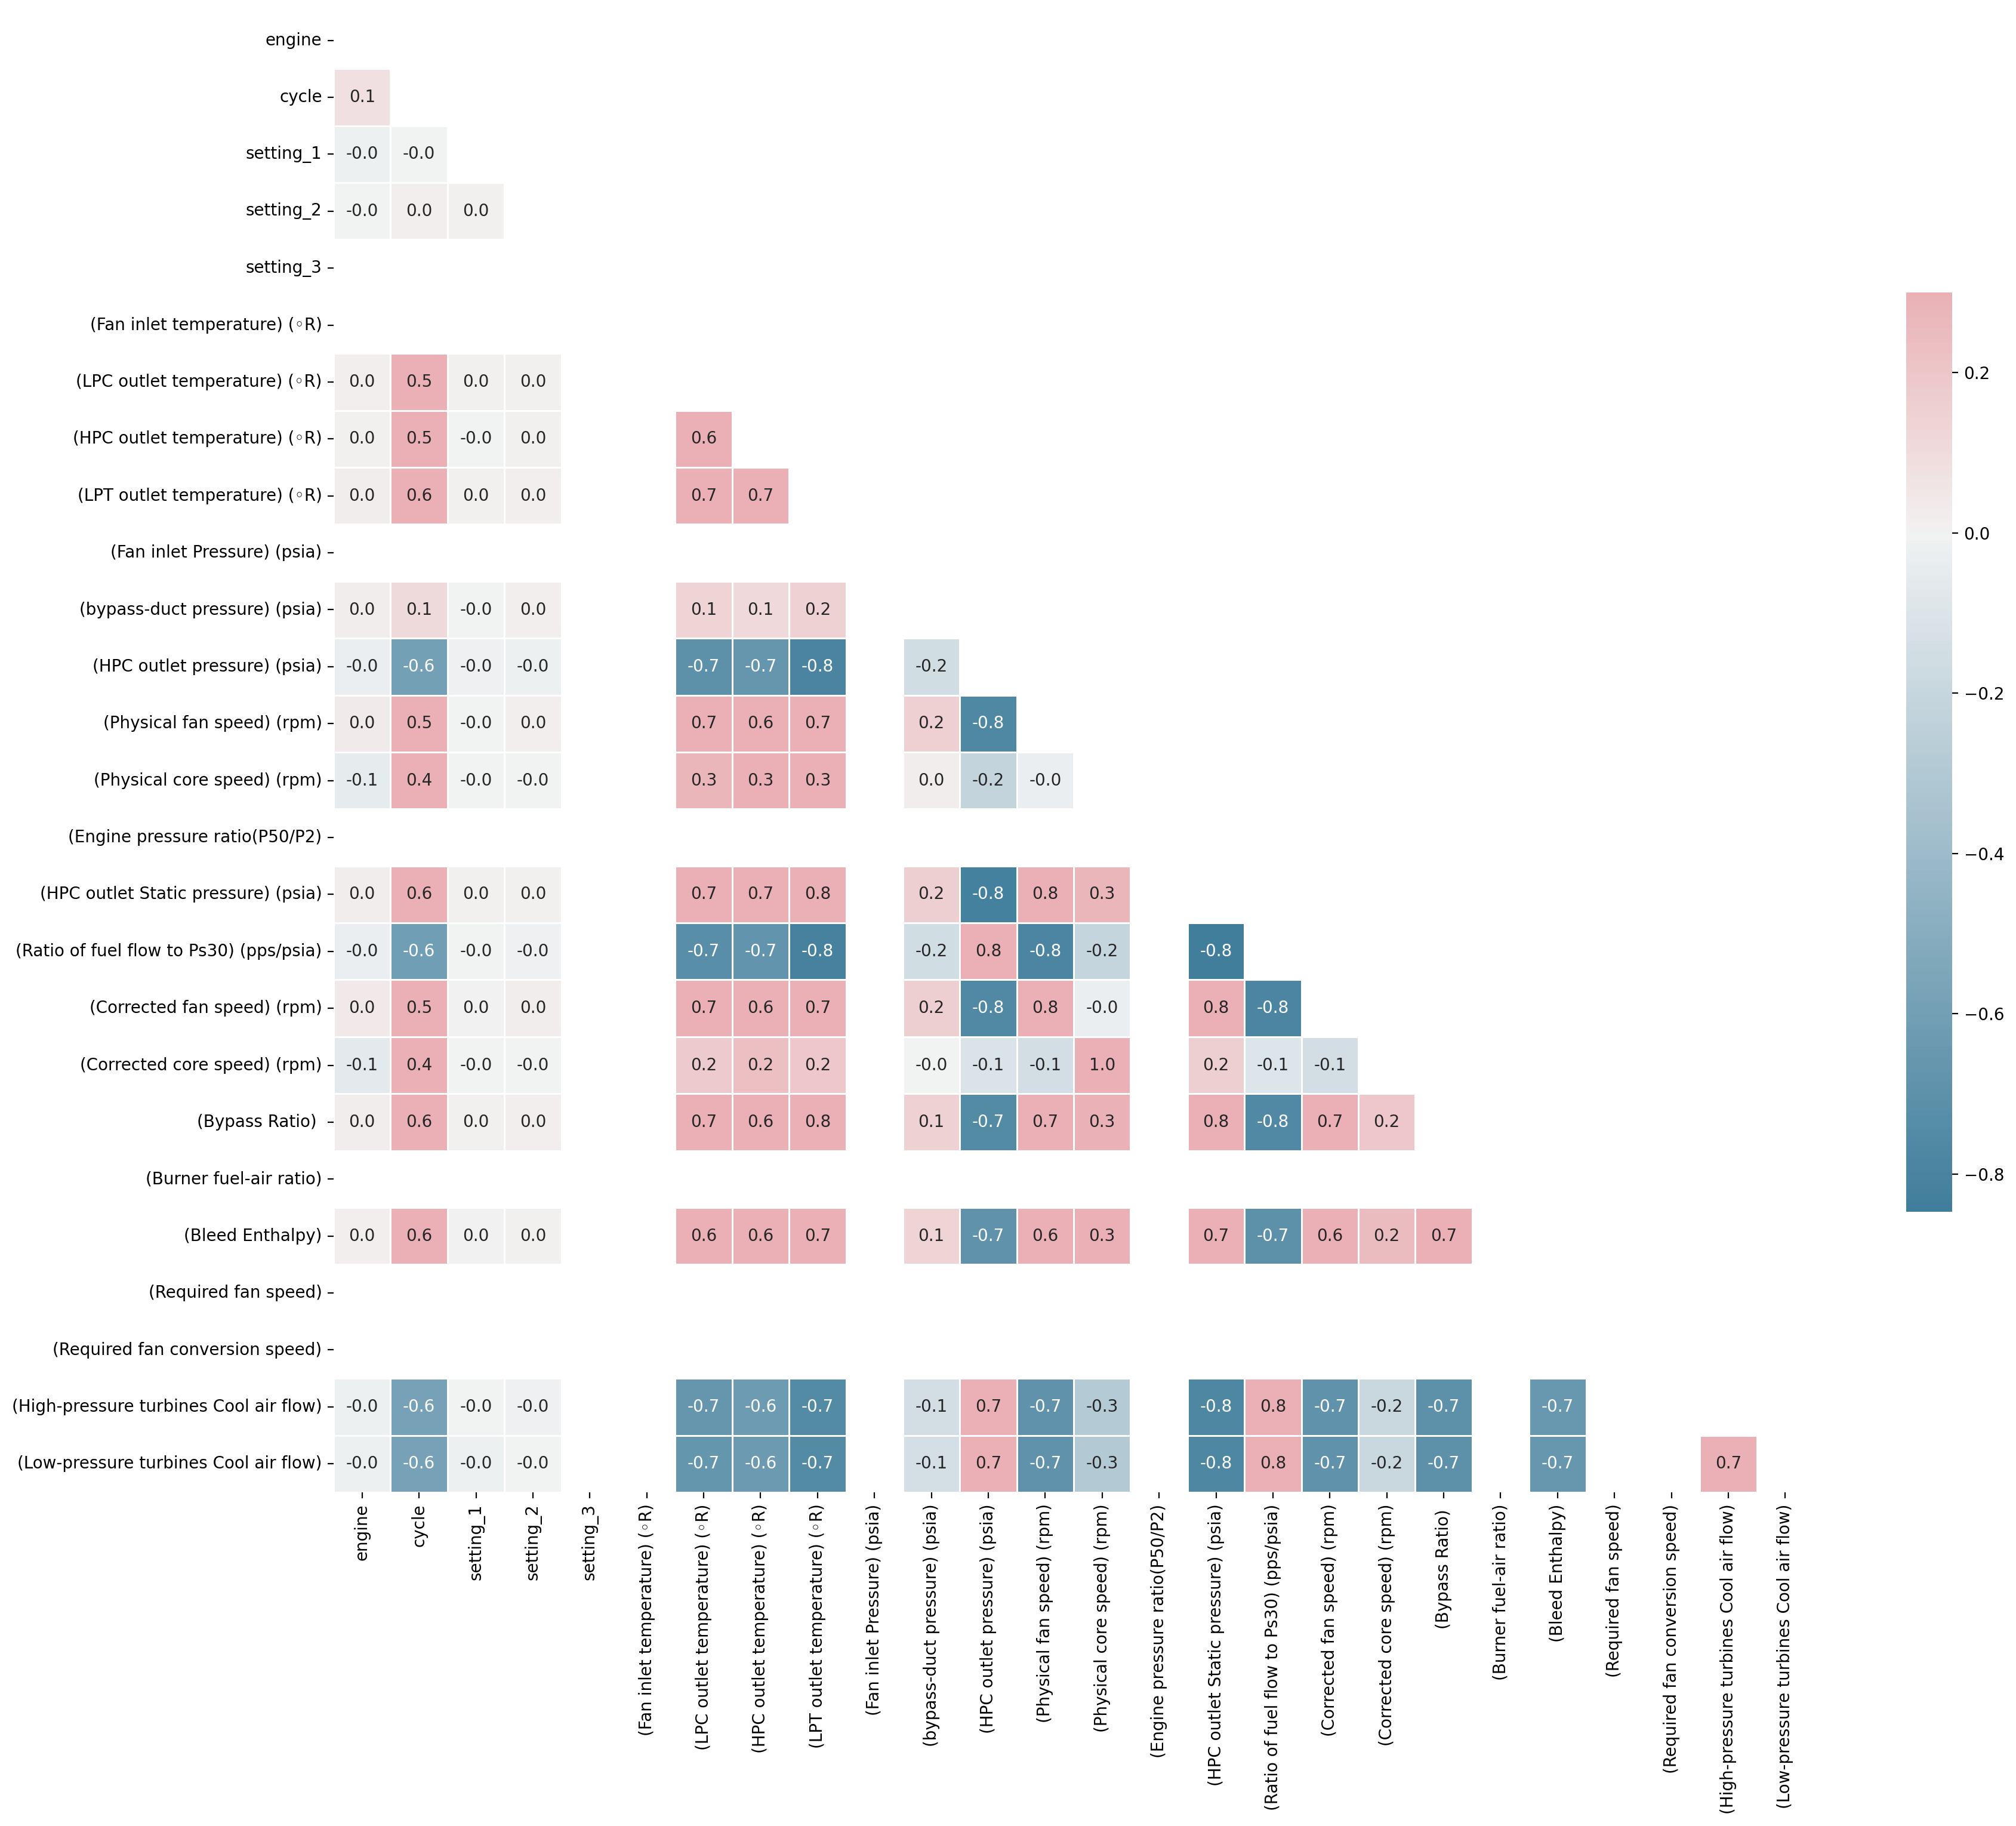

In [ ]:

corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 10, as_cmap=True)

# Draw the heatmap with annotation
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=.3,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True,           # <- Add this line
    fmt=".1f"             # <- Format the numbers to 2 decimal places
)

plt.show()


In [ ]:
sens_const_values = []
for feature in list(setting_names + sensor_names):
    try:
        if df_train[feature].min()==df_train[feature].max():
            sens_const_values.append(feature)
    except:
        pass

print(sens_const_values)
df_train.drop(sens_const_values,axis=1,inplace=True)
df_test.drop(sens_const_values,axis=1,inplace=True)

['setting_3', '(Fan inlet temperature) (◦R)', '(Fan inlet Pressure) (psia)', '(Engine pressure ratio(P50/P2)', '(Burner fuel-air ratio)', '(Required fan speed)', '(Required fan conversion speed)']


In [ ]:
cor_matrix = df_train.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(corr_features)
df_train.drop(corr_features,axis=1,inplace=True)
df_test.drop(corr_features,axis=1,inplace=True)

['(Corrected core speed) (rpm)']


In [ ]:
list(df_train)

['engine',
 'cycle',
 'setting_1',
 'setting_2',
 '(LPC outlet temperature) (◦R)',
 '(HPC outlet temperature) (◦R)',
 '(LPT outlet temperature) (◦R)',
 '(bypass-duct pressure) (psia)',
 '(HPC outlet pressure) (psia)',
 '(Physical fan speed) (rpm)',
 '(Physical core speed) (rpm)',
 '(HPC outlet Static pressure) (psia)',
 '(Ratio of fuel flow to Ps30) (pps/psia)',
 '(Corrected fan speed) (rpm)',
 '(Bypass Ratio) ',
 '(Bleed Enthalpy)',
 '(High-pressure turbines Cool air flow)',
 '(Low-pressure turbines Cool air flow)']

In [ ]:
df_train.head()

engine  cycle  setting_1  setting_2  (LPC outlet temperature) (◦R)  (HPC outlet temperature) (◦R)  (LPT outlet temperature) (◦R)  (bypass-duct pressure) (psia)  (HPC outlet pressure) (psia)  (Physical fan speed) (rpm)  (Physical core speed) (rpm)  (HPC outlet Static pressure) (psia)  (Ratio of fuel flow to Ps30) (pps/psia)  (Corrected fan speed) (rpm)  (Bypass Ratio)   (Bleed Enthalpy)  (High-pressure turbines Cool air flow)  (Low-pressure turbines Cool air flow)
0       1      1    -0.0007    -0.0004                         641.82                        1589.70                        1400.60                          21.61                        554.36                     2388.06                      9046.19                                47.47                                   521.66                      2388.02           8.4195               392                                   39.06                                23.4190
1       1      2     0.0019    -0.0003                         642.15                        1591.82                        1403.14                          21.61                        553.75                     2388.04                      9044.07                                47.49                                   522.28                      2388.07           8.4318               392                                   39.00                                23.4236
2       1      3    -0.0043     0.0003                         642.35                        1587.99                        1404.20                          21.61                        554.26                     2388.08                      9052.94                                47.27                                   522.42                      2388.03           8.4178               390                                   38.95                                23.3442
3       1      4     0.0007     0.0000                         642.35                        1582.79                        1401.87                          21.61                        554.45                     2388.11                      9049.48                                47.13                                   522.86                      2388.08           8.3682               392                                   38.88                                23.3739
4       1      5    -0.0019    -0.0002                         642.37                        1582.85                        1406.22                          21.61                        554.00                     2388.06                      9055.15                                47.28                                   522.19                      2388.04           8.4294               393                                   38.90                                23.4044

In [ ]:
features = list(df_train.columns)

In [ ]:
# check for missing data
for feature in features:
    print(feature + " - " + str(len(df_train[df_train[feature].isna()])))

engine - 0
cycle - 0
setting_1 - 0
setting_2 - 0
(LPC outlet temperature) (◦R) - 0
(HPC outlet temperature) (◦R) - 0
(LPT outlet temperature) (◦R) - 0
(bypass-duct pressure) (psia) - 0
(HPC outlet pressure) (psia) - 0
(Physical fan speed) (rpm) - 0
(Physical core speed) (rpm) - 0
(HPC outlet Static pressure) (psia) - 0
(Ratio of fuel flow to Ps30) (pps/psia) - 0
(Corrected fan speed) (rpm) - 0
(Bypass Ratio)  - 0
(Bleed Enthalpy) - 0
(High-pressure turbines Cool air flow) - 0
(Low-pressure turbines Cool air flow) - 0


In [ ]:
# define the maximum life of each engine, as this could be used to obtain the RUL at each point in time of the engine's life
df_train_RUL = df_train.groupby(['engine']).agg({'cycle':'max'})
df_train_RUL.rename(columns={'cycle':'life'},inplace=True)
df_train_RUL.head()

life
engine      
1        192
2        287
3        179
4        189
5        269

In [ ]:
df_train=df_train.merge(df_train_RUL,how='left',on=['engine'])

In [ ]:
df_train['RUL']=df_train['life']-df_train['cycle']
df_train.drop(['life'],axis=1,inplace=True)

# the RUL prediction is only useful nearer to the end of the engine's life, therefore we put an upper limit on the RUL
# this is a bit sneaky, since it supposes that the test set has RULs of less than this value, the closer you are
# to the true value, the more accurate the model will be
df_train['RUL'][df_train['RUL']>125]=125
df_train.head()

engine  cycle  setting_1  setting_2  (LPC outlet temperature) (◦R)  (HPC outlet temperature) (◦R)  (LPT outlet temperature) (◦R)  (bypass-duct pressure) (psia)  (HPC outlet pressure) (psia)  (Physical fan speed) (rpm)  (Physical core speed) (rpm)  (HPC outlet Static pressure) (psia)  (Ratio of fuel flow to Ps30) (pps/psia)  (Corrected fan speed) (rpm)  (Bypass Ratio)   (Bleed Enthalpy)  (High-pressure turbines Cool air flow)  (Low-pressure turbines Cool air flow)  RUL
0       1      1    -0.0007    -0.0004                         641.82                        1589.70                        1400.60                          21.61                        554.36                     2388.06                      9046.19                                47.47                                   521.66                      2388.02           8.4195               392                                   39.06                                23.4190  125
1       1      2     0.0019    -0.0003                         642.15                        1591.82                        1403.14                          21.61                        553.75                     2388.04                      9044.07                                47.49                                   522.28                      2388.07           8.4318               392                                   39.00                                23.4236  125
2       1      3    -0.0043     0.0003                         642.35                        1587.99                        1404.20                          21.61                        554.26                     2388.08                      9052.94                                47.27                                   522.42                      2388.03           8.4178               390                                   38.95                                23.3442  125
3       1      4     0.0007     0.0000                         642.35                        1582.79                        1401.87                          21.61                        554.45                     2388.11                      9049.48                                47.13                                   522.86                      2388.08           8.3682               392                                   38.88                                23.3739  125
4       1      5    -0.0019    -0.0002                         642.37                        1582.85                        1406.22                          21.61                        554.00                     2388.06                      9055.15                                47.28                                   522.19                      2388.04           8.4294               393                                   38.90                                23.4044  125

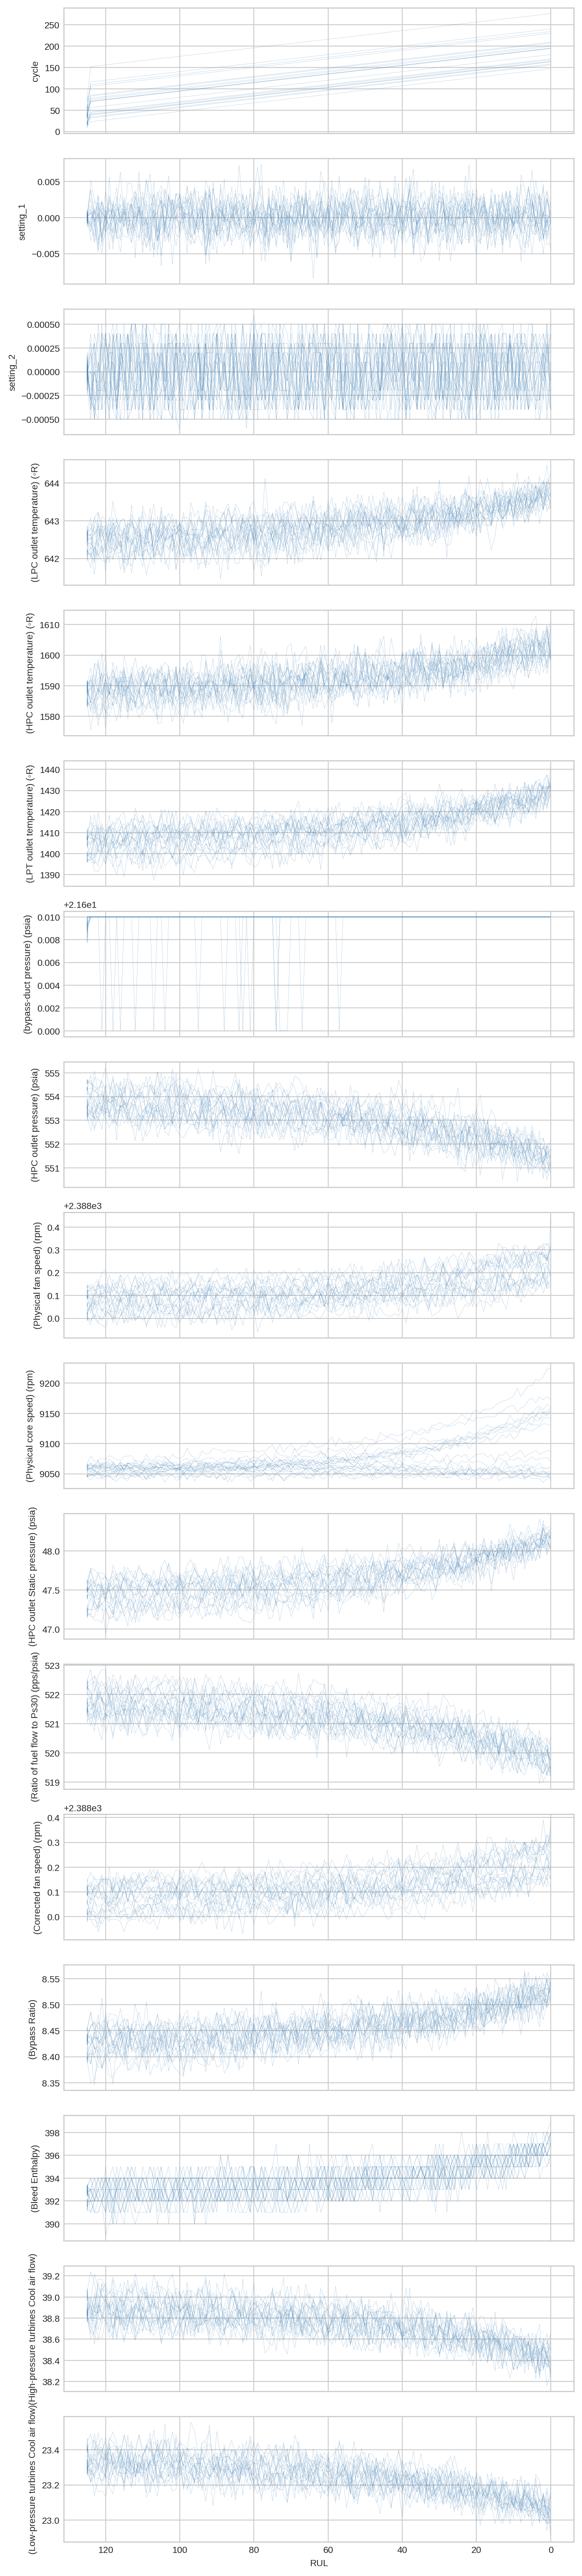

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize']=8,40
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 0.1
plot_items = list(df_train.columns)[1:-1]
fig,ax = plt.subplots(len(plot_items),sharex=True)
ax[0].invert_xaxis()

engines = list(df_train['engine'].unique())

for engine in engines[10:30]:
    for i,item in enumerate(plot_items):
        f = sns.lineplot(data=df_train[df_train['engine']==engine],x='RUL',y=item,color='steelblue',ax=ax[i],
                        )

In [ ]:

Selected_Features = []
import statsmodels.api as sm

def backward_regression(X, y, initial_list=[], threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
X = df_train.iloc[:,1:-1]
y = df_train.iloc[:,-1]
backward_regression(X, y)

worst_feature : setting_1, 0.3590854598813067 
worst_feature : setting_2, 0.18806323573825234 

Selected Features:
['cycle', '(LPC outlet temperature) (◦R)', '(HPC outlet temperature) (◦R)', '(LPT outlet temperature) (◦R)', '(bypass-duct pressure) (psia)', '(HPC outlet pressure) (psia)', '(Physical fan speed) (rpm)', '(Physical core speed) (rpm)', '(HPC outlet Static pressure) (psia)', '(Ratio of fuel flow to Ps30) (pps/psia)', '(Corrected fan speed) (rpm)', '(Bypass Ratio) ', '(Bleed Enthalpy)', '(High-pressure turbines Cool air flow)', '(Low-pressure turbines Cool air flow)']


In [ ]:
Selected_Features

[['cycle',
  '(LPC outlet temperature) (◦R)',
  '(HPC outlet temperature) (◦R)',
  '(LPT outlet temperature) (◦R)',
  '(bypass-duct pressure) (psia)',
  '(HPC outlet pressure) (psia)',
  '(Physical fan speed) (rpm)',
  '(Physical core speed) (rpm)',
  '(HPC outlet Static pressure) (psia)',
  '(Ratio of fuel flow to Ps30) (pps/psia)',
  '(Corrected fan speed) (rpm)',
  '(Bypass Ratio) ',
  '(Bleed Enthalpy)',
  '(High-pressure turbines Cool air flow)',
  '(Low-pressure turbines Cool air flow)']]

In [ ]:
# X.head()
feature_names = Selected_Features[0]
np.shape(X)

(20631, 17)

In [ ]:
import time
model_performance = pd.DataFrame(columns=['r-Squared','RMSE','total time'])

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, accuracy_score

import sklearn
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.ensemble import RandomForestRegressor

model_performance = pd.DataFrame(columns=['R2','RMSE', 'time to train','time to predict','total time'])


def R_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

In [ ]:
df_test_cycle = df_test.groupby(['engine']).agg({'cycle':'max'})
df_test_cycle.rename(columns={'cycle':'life'},inplace=True)
df_test_max = df_test.merge(df_test_cycle,how='left',on=['engine'])
df_test_max = df_test_max[(df_test_max['cycle']==df_test_max['life'])]
df_test_max.drop(['life'],axis=1,inplace=True)
# df_test_max

In [ ]:
X_train = df_train[feature_names]
y_train = df_train.iloc[:,-1]
X_test = df_test_max[feature_names]
y_test = df_test_RUL.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# LSTM

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import BatchNormalization, Dropout
# from tensorflow.keras.layers import preprocessing # Removed incorrect import
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
import sklearn

# final LSTM

In [ ]:
model = keras.Sequential()
model.add(LSTM(100,
                return_sequences=True,
               input_shape=(1,X_train.shape[1])
              ))
model.add(BatchNormalization())
model.add(LSTM(80,
                return_sequences=True,
               activation='tanh'
              ))
model.add(Dropout(0.5))
model.add(LSTM(50,
               return_sequences=True,
               activation='tanh',
              ))
model.add(Dropout(0.5))
model.add(Dense(100,
               activation='relu',
              ))
model.add(Dense(1))

In [ ]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.95,
    staircase=True)

In [ ]:
model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 100)         │        46,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 100)         │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 80)          │        57,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 80)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 50)          │        26,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1, 100)         │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1, 1)           │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,121 (531.72 KB)

 Trainable params: 135,921 (530.94 KB)

 Non-trainable params: 200 (800.00 B)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=4, min_lr=1e-6, verbose=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_s, X_val, y_train_s, y_val = train_test_split(X_train, y_train, test_size=0.1)

#The LSTM input layer must be 3D.
#The meaning of the 3 input dimensions are: samples, time steps, and features.
#reshape input data
X_train_reshaped = X_train_s.reshape(X_train_s.shape[0], 1, X_train_s.shape[1])
X_val_reshaped = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
%%time

start = time.time()
history = model.fit(x=X_train_reshaped,y=y_train_s,
                    validation_data = (X_val_reshaped,y_val),
                    epochs = 30,
                    # shuffle = True,
                    batch_size = 400,
                    callbacks=[reduce_lr]
                   )
end_train = time.time()
y_predictions_lstm = model.predict(X_test_reshaped) # These are the predictions from the test data.
end_predict = time.time()
y_predictions_lstm = y_predictions_lstm[:,0][:,0]
model_performance.loc['LSTM'] = [sklearn.metrics.r2_score(y_test, y_predictions_lstm),
                                   np.sqrt(mean_squared_error(y_test,y_predictions_lstm)),
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(sklearn.metrics.r2_score(y_test, y_predictions_lstm)))
print('Root Mean Squared Error: '+ "{:.2f}".format(np.sqrt(mean_squared_error(y_test,y_predictions_lstm))))

Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 9167.2383 - val_loss: 8233.0469 - learning_rate: 0.0010
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6016.3843 - val_loss: 2136.2629 - learning_rate: 0.0010
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1720.8623 - val_loss: 1952.7823 - learning_rate: 0.0010
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 778.4930 - val_loss: 1368.1851 - learning_rate: 0.0010
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 631.0787 - val_loss: 805.2634 - learning_rate: 0.0010
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 558.8346 - val_loss: 874.6850 - learning_rate: 0.0010
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 507.6245 - val_loss: 846.2938 - learning_rate: 0.0010
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 478.0586 - val_loss: 718.6642 - learning_rate: 0.0010
Epoch 9/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 460.3799 - val_loss: 571.5143 

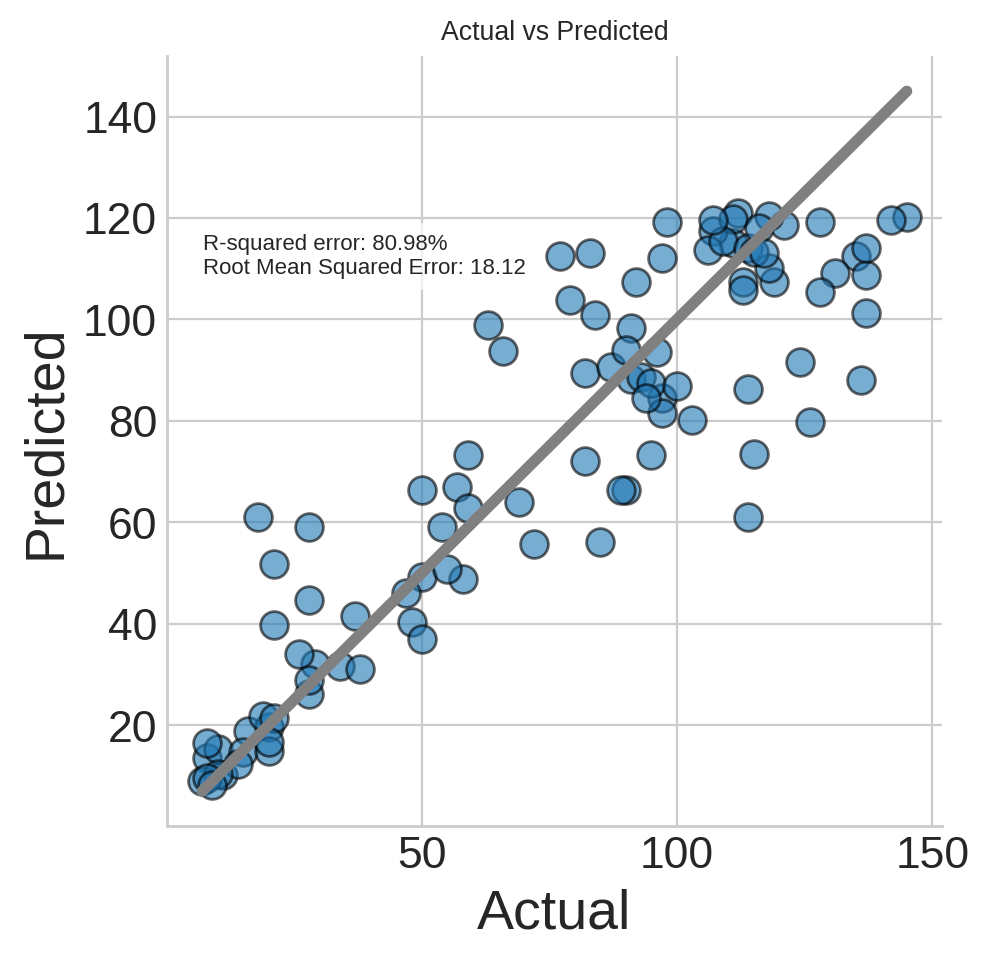

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize']=5,5
# Changed font.family to a font available in matplotlib to avoid warnings
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_predictions_lstm,
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

# Calculate RMSE by taking the square root of the mean squared error
rmse = mean_squared_error(y_test,y_predictions_lstm)**0.5

# Calculate R-squared using sklearn.metrics.r2_score
r2 = sklearn.metrics.r2_score(y_test, y_predictions_lstm)

x_pos = 0.05 * max(y_test)
y_pos = 0.9 * max(y_predictions_lstm)

plt.annotate(
    text=(
        # Use the calculated R-squared
        'R-squared error: ' + "{:.2%}".format(r2) + '\n' +
        'Root Mean Squared Error: ' + "{:.2f}".format(rmse)
    ),
    xy=(x_pos, y_pos),
    size='medium',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # optional for readability
)

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

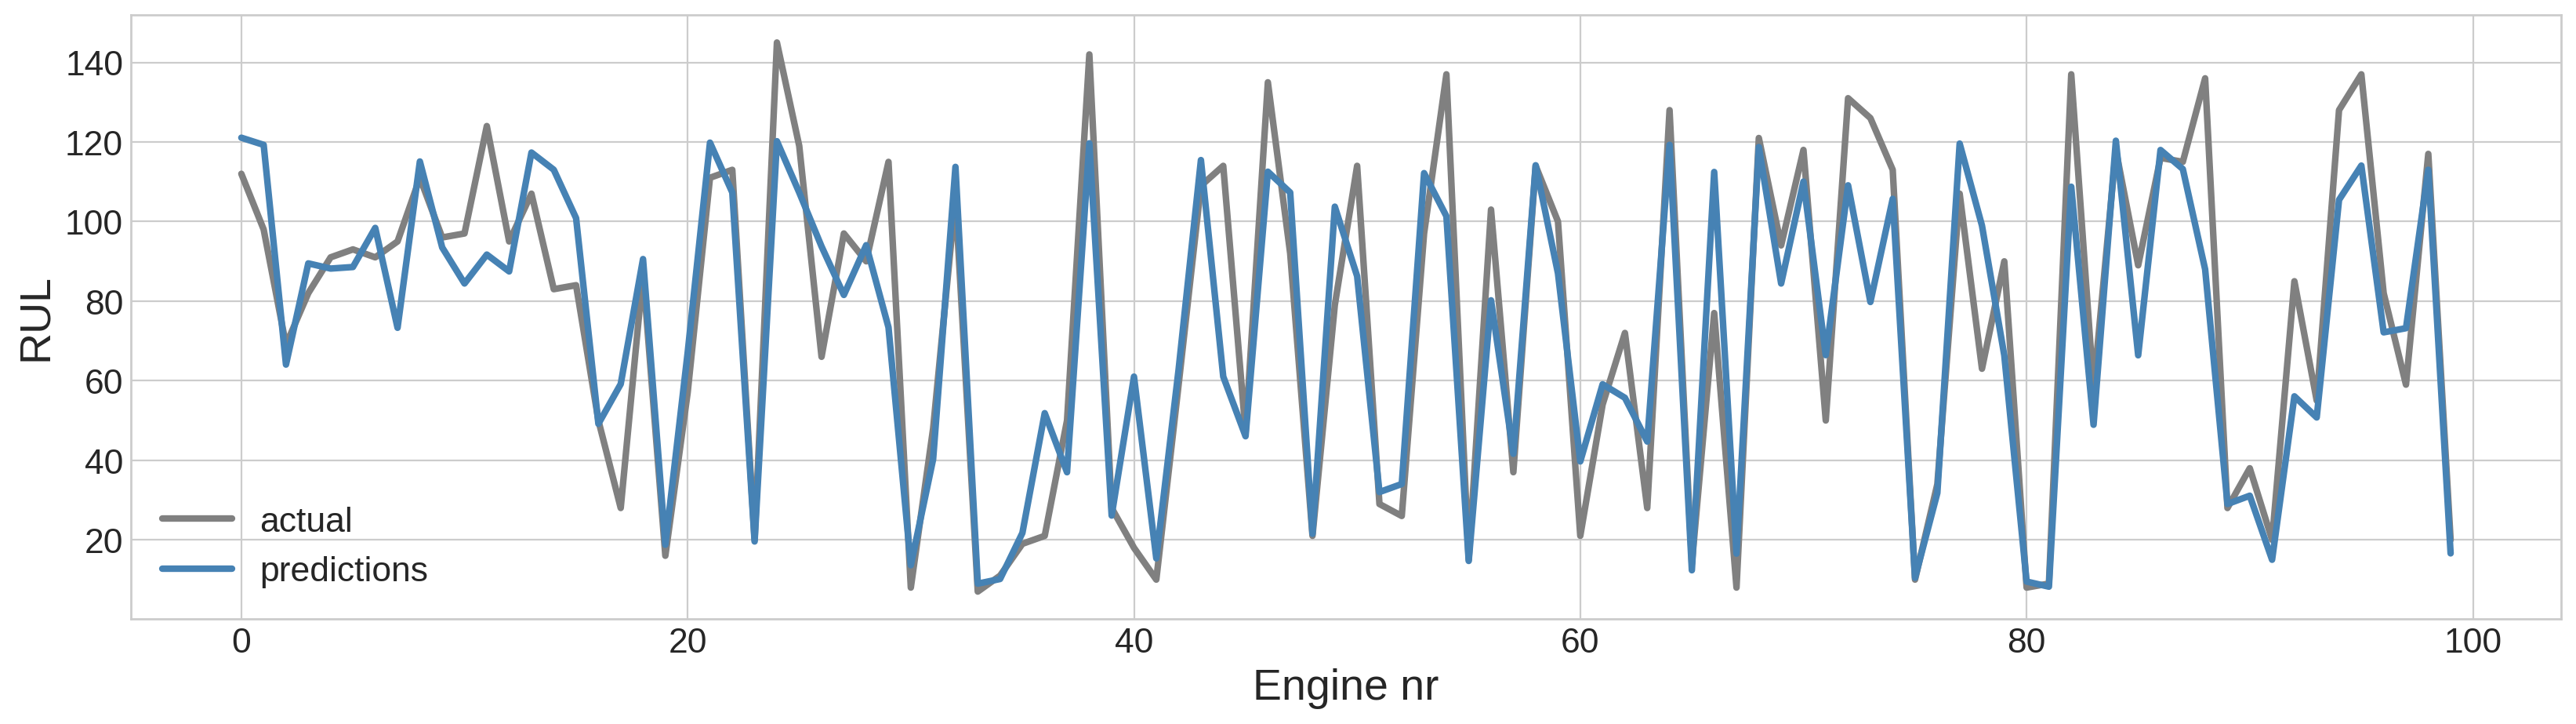

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize']=20,5

fig,ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Engine nr')

g = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
                y=y_test.values.flatten(),
                color='gray',
                label = 'actual',
                ax=ax)

f = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
                y=y_predictions_lstm,
                color='steelblue',
                label = 'predictions',
                ax=ax)
ax.legend()

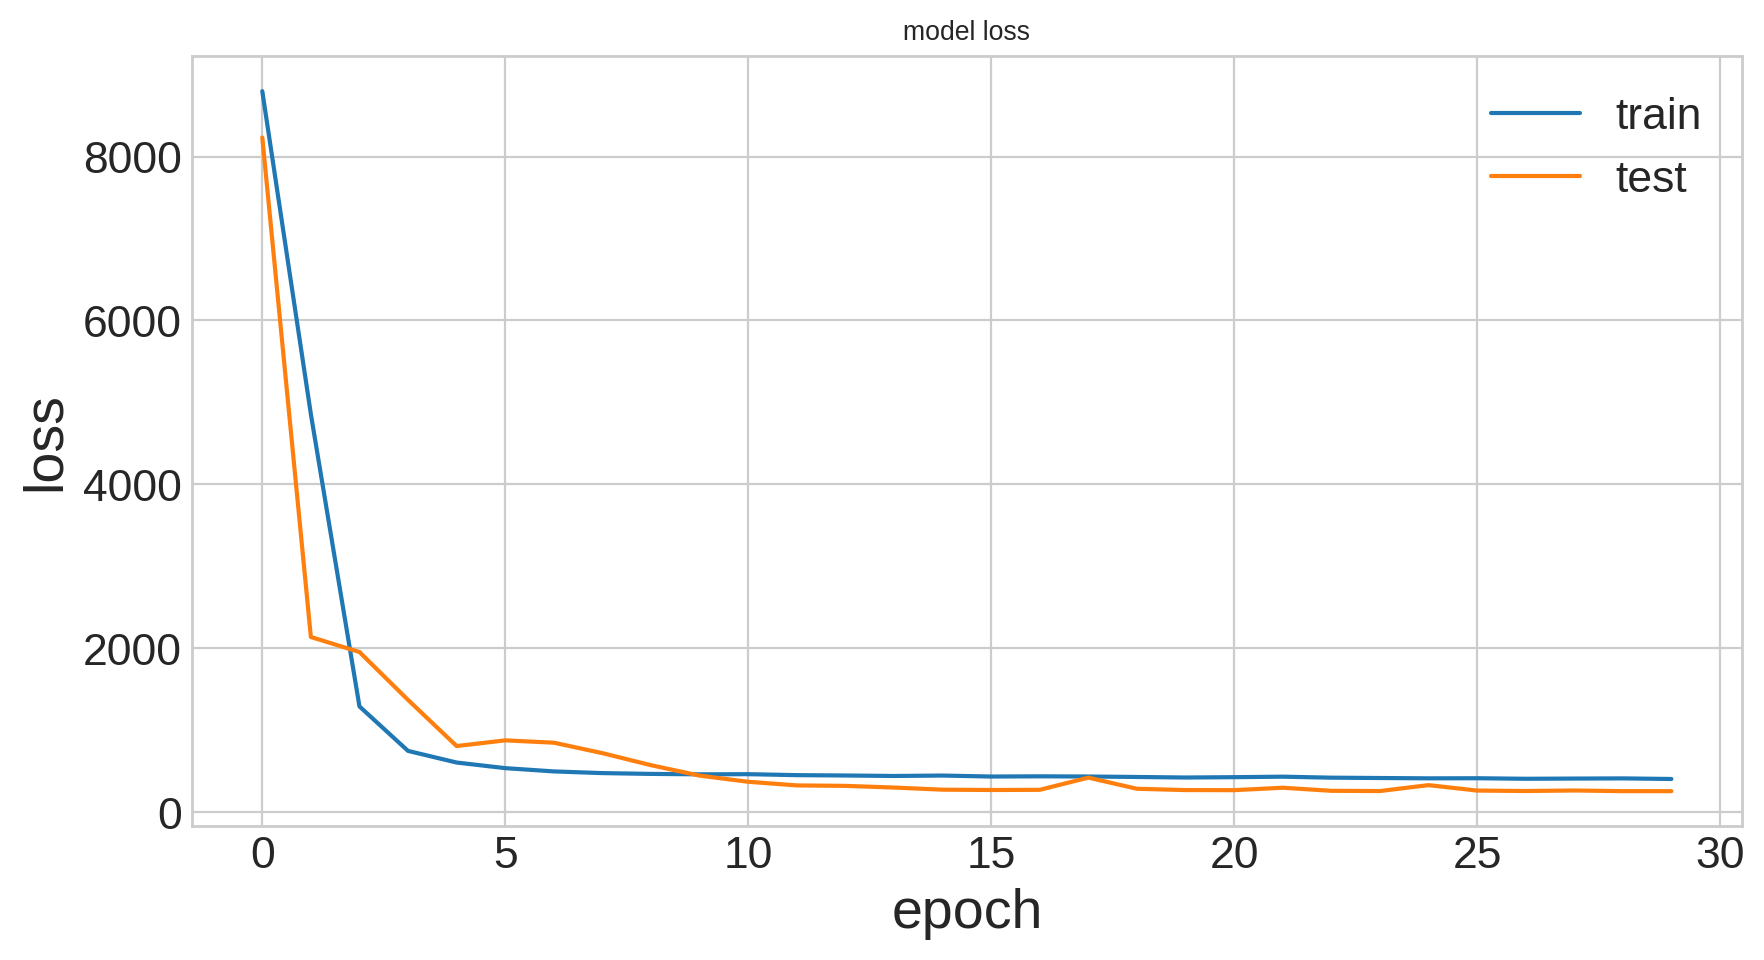

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize']=5,5
# Changed font.family to a font available in matplotlib to avoid warnings
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 1.5
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
model = keras.Sequential()
model.add(LSTM(100,
                return_sequences=True,
               input_shape=(1,X_train.shape[1])
              ))
model.add(BatchNormalization())
model.add(LSTM(80,
                return_sequences=True,
               activation='tanh'
              ))
model.add(Dropout(0.5))
model.add(LSTM(50,
               return_sequences=True,
               activation='sigmoid',
              ))
model.add(Dropout(0.5))
model.add(Dense(100,
               activation='relu',
              ))
model.add(Dense(1))

In [ ]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.95,
    staircase=True)

In [ ]:
model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 1, 100)         │        46,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 100)         │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 1, 80)          │        57,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1, 80)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 1, 50)          │        26,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1, 100)         │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1, 1)           │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,121 (531.72 KB)

 Trainable params: 135,921 (530.94 KB)

 Non-trainable params: 200 (800.00 B)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=4, min_lr=1e-6, verbose=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_s, X_val, y_train_s, y_val = train_test_split(X_train, y_train, test_size=0.1)

#The LSTM input layer must be 3D.
#The meaning of the 3 input dimensions are: samples, time steps, and features.
#reshape input data
X_train_reshaped = X_train_s.reshape(X_train_s.shape[0], 1, X_train_s.shape[1])
X_val_reshaped = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
%%time

start = time.time()
history = model.fit(x=X_train_reshaped,y=y_train_s,
                    validation_data = (X_val_reshaped,y_val),
                    epochs = 50,
                    # shuffle = True,
                    batch_size = 400,
                    callbacks=[reduce_lr]
                   )
end_train = time.time()
y_predictions_lstm = model.predict(X_test_reshaped) # These are the predictions from the test data.
end_predict = time.time()
y_predictions_lstm = y_predictions_lstm[:,0][:,0]
model_performance.loc['LSTM'] = [sklearn.metrics.r2_score(y_test, y_predictions_lstm),
                                   np.sqrt(mean_squared_error(y_test,y_predictions_lstm)),
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(sklearn.metrics.r2_score(y_test, y_predictions_lstm)))
print('Root Mean Squared Error: '+ "{:.2f}".format(np.sqrt(mean_squared_error(y_test,y_predictions_lstm))))

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 409.1447 - val_loss: 254.3644 - learning_rate: 1.0000e-06
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 410.0122 - val_loss: 254.3369 - learning_rate: 1.0000e-06
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 411.5890 - val_loss: 254.3567 - learning_rate: 1.0000e-06
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 421.8589 - val_loss: 254.3544 - learning_rate: 1.0000e-06
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 416.0264 - val_loss: 254.3719 - learning_rate: 1.0000e-06
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 412.7841 - val_loss: 254.4319 - learning_rate: 1.0000e-06
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 414.3736 - val_loss: 254.2949 - learning_rate: 1.0000e-06
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 415.3603 - val_loss: 254.2912 - learning_rate: 1.0000e-06
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 414.2